In [10]:
import torch
import torch.nn.functional as F

In [11]:
import SelectionMask as sm

In [12]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Defines transform pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])

# Download and transform
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

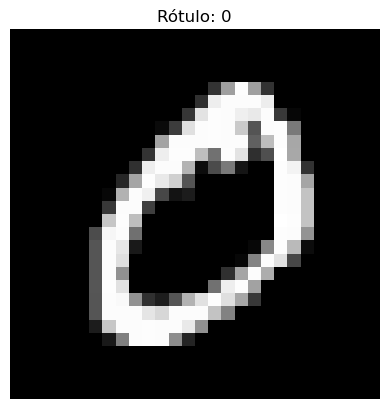

In [13]:
import matplotlib.pyplot as plt

img, label = train_dataset[1]
img = img.squeeze()

def plot_image(img):
    plt.imshow(img, cmap='gray')
    plt.title(f'Rótulo: {label}')
    plt.axis('off')
    plt.show()

plot_image(img)

In [14]:
img, _ = train_dataset[1]
mask = sm.SelectionMask(img.unsqueeze(0).size())
print(mask.binarized().shape)
aux = sm.SelectionMask((1,1,1,1))
aux.tensor = mask.interpolated((56, 56))
print(aux.binarized().shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 56, 56])


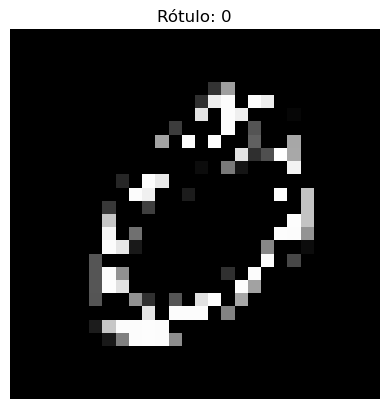

In [15]:
img = img.unsqueeze(0)
new_image = mask.apply(img)
plot_image(new_image.squeeze())


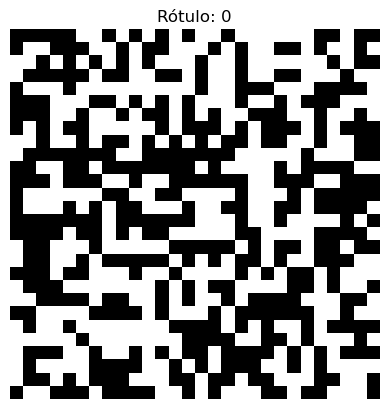

In [16]:
plot_image(mask.binarized().squeeze())

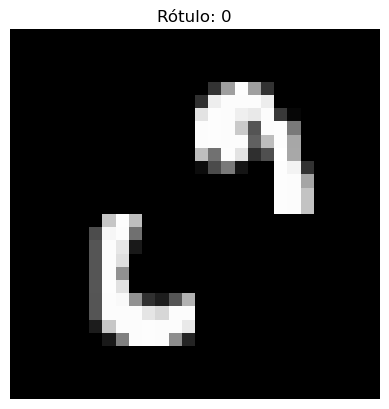

In [17]:
mask.tensor = torch.tensor([[ (i + j) % 2 for j in range(2)] for i in range(2)])
mask.tensor = mask.tensor.unsqueeze(0).unsqueeze(0)

mask.tensor = mask.tensor.float()
mask.tensor = mask.interpolated((28, 28)).int()

new_image = mask.apply(img)
plot_image(new_image.squeeze())


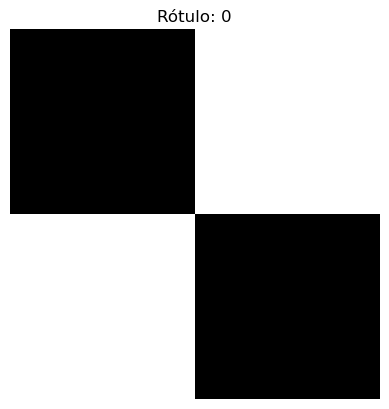

In [18]:
plot_image(mask.tensor.squeeze())